# **Extracting and analyzing data form `idescat.com`**

## **Requirements**

In [1]:
import requests
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
sns.set_style("whitegrid")

## **Maria's analysis in Catalonia**

### **Extracting and processing the data**

In [2]:


years = ['2018', '2019', '2020', '2021', '2022']
Maria_abs_freq, Maria_total_position, Maria_girls_position, Maria_total_percent, Maria_girls_percent = [], [], [], [], []

for year in years :

    url = f'https://api.idescat.cat/onomastica/v1/nadons/dades.json?id=40683&t={year}&lang=es'
    response = requests.get(url)
    data_json = response.json() 

    Maria_abs_freq.append(data_json['onomastica_nadons']['ff']['f']['pos1']['v']) # abs freq name Maria over the names of childs born in Catalonia in {year}
    Maria_total_position.append(data_json['onomastica_nadons']['ff']['f']['rank']['total']) # rank of name Maria over the names of childs born in Catalonia in {year}
    Maria_girls_position.append(data_json['onomastica_nadons']['ff']['f']['rank']['sex']) # rank of name Maria over the names of girls born in Catalonia in {year}
    Maria_total_percent.append(data_json['onomastica_nadons']['ff']['f']['pos1']['w']['total']) # % of childs born in Catalonia in {year} whose name is Maria
    Maria_girls_percent.append(data_json['onomastica_nadons']['ff']['f']['pos1']['w']['sex'])  # % of girls born in Catalonia in {year} whose name is Maria

Maria_dict = dict()
Maria_dict['years'] = years
Maria_dict['Maria_abs_freq'] = Maria_abs_freq
Maria_dict['Maria_total_position'] = Maria_total_position
Maria_dict['Maria_girls_position'] = Maria_girls_position
Maria_dict['Maria_total_percent'] = Maria_total_percent
Maria_dict['Maria_girls_percent'] = Maria_girls_percent

Maria_df = pd.DataFrame(Maria_dict)

for col_name in Maria_df.columns :
    if col_name in ['Maria_abs_freq', 'Maria_total_position', 'Maria_girls_position'] :
        Maria_df[col_name] = Maria_df[col_name].astype('int64')
    elif col_name in ['Maria_total_percent', 'Maria_girls_percent'] :
        Maria_df[col_name] = Maria_df[col_name].astype('float64')

In [6]:
# Data-frame with the data

print('Maria\'s analysis in Catalonia\n')
display(Maria_df)

Maria's analysis in Catalonia



,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,466,8,4,7.38,15.15
1,2019,387,13,6,6.36,13.00
2,2020,318,20,10,5.49,11.23
3,2021,327,19,8,5.67,11.65
4,2022,267,28,13,4.74,9.83


### **Plotting the results**

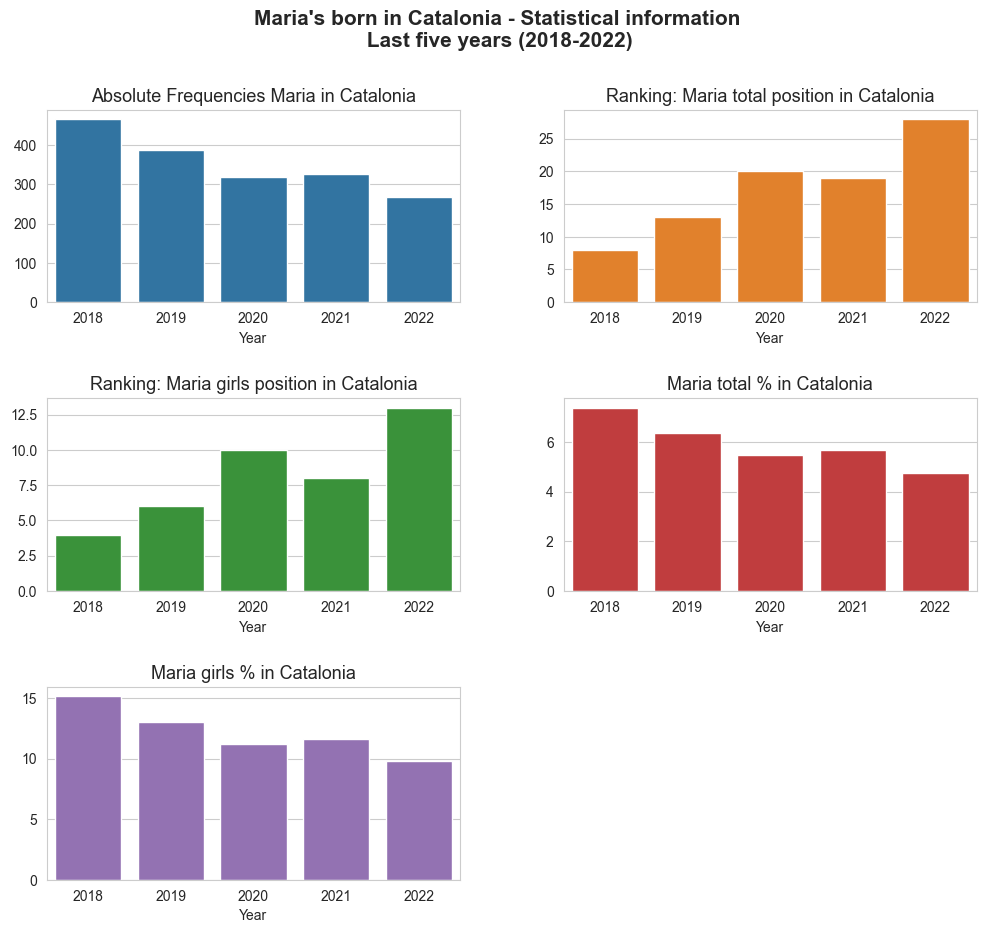

In [15]:
selected_columns = [x for x in Maria_df.columns if x != 'years']
titles = ["Absolute Frequencies Maria in Catalonia", "Ranking: Maria total position in Catalonia",
          "Ranking: Maria girls position in Catalonia", "Maria total % in Catalonia", "Maria girls % in Catalonia"]

# Define the number of rows and columns for the matrix plot
num_cols = 2  # You can adjust the number of columns as needed
num_rows = int(np.ceil(len(selected_columns) / num_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

colors = sns.color_palette("tab10", len(selected_columns))

# Loop through each 'geo' and create a subplot in the matrix
for (i, col_name), color, title in zip(enumerate(selected_columns), colors, titles) :
    ax = axes[i]  # Get the current axis
    sns.barplot(x="years", y=col_name, data=Maria_df, color=color, ax=ax)
    ax.set_title(f"{title}", fontsize=13)
    xticks_index = np.arange(0, len(Maria_df), 1)
    ax.set_xticks(xticks_index)
    ax.tick_params(axis='x', rotation=0)
    ax.set_xlabel('Year')
    ax.set_ylabel('')

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(len(selected_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle('Maria\'s born in Catalonia - Statistical information\n Last five years (2018-2022)', fontsize=15, y=0.98, weight='bold') # Establishing a general tittle for the plot.
plt.subplots_adjust(hspace=0.5, wspace=0.25) # Adjust vertical (hspace) and horizontal (wspace) spacing
fig.savefig('Marias_Catalonia' + '.jpg', format='jpg', dpi=550)
# plt.tight_layout()
plt.show()

## **Maria's analysis in Catalonia by city (comarca)**

### **Extracting and processing the data**

In [16]:
print('Maria\'s analysis in Catalonia by city (comarca)\n')

years = ['2018', '2019', '2020', '2021', '2022']
Maria_df_dict = dict()

for com_id in range(0, 42): # 42 = len(data_json['onomastica_nadons']['ff']['f']) - 1

    Maria_abs_freq, Maria_total_position, Maria_girls_position, Maria_total_percent, Maria_girls_percent = [], [], [], [], []

    for year in years :

        url = f'https://api.idescat.cat/onomastica/v1/nadons/dades.json?id=40683&class=com&t={year}&lang=es'
        response = requests.get(url)
        data_json = response.json() 

        Maria_abs_freq.append(data_json['onomastica_nadons']['ff']['f'][com_id]['pos1']['v']) # abs freq name Maria over the names of childs born in comarca {com_id} in {year}
        Maria_total_position.append(data_json['onomastica_nadons']['ff']['f'][com_id]['rank']['total']) # rank of name Maria over the names of childs born in comarca {com_id} in {year}
        Maria_girls_position.append(data_json['onomastica_nadons']['ff']['f'][com_id]['rank']['sex']) # rank of name Maria over the names of girls born in comarca {com_id} in {year}
        Maria_total_percent.append(data_json['onomastica_nadons']['ff']['f'][com_id]['pos1']['w']['total']) # % of childs born in comarca {com_id} in {year} whose name is Maria
        Maria_girls_percent.append(data_json['onomastica_nadons']['ff']['f'][com_id]['pos1']['w']['sex'])  # % of girls born in comarca {com_id} in {year} whose name is Maria

    Maria_dict = dict()
    Maria_dict['years'] = years
    Maria_dict['Maria_abs_freq'] = Maria_abs_freq
    Maria_dict['Maria_total_position'] = Maria_total_position
    Maria_dict['Maria_girls_position'] = Maria_girls_position
    Maria_dict['Maria_total_percent'] = Maria_total_percent
    Maria_dict['Maria_girls_percent'] = Maria_girls_percent  
    com = data_json['onomastica_nadons']['ff']['f'][com_id]['c']['content']
    Maria_df_dict[com] = pd.DataFrame(Maria_dict)

Maria's analysis in Catalonia by city (comarca)



In [17]:
###  Catalonia city (comarca) with more Maria\'s born by year

Maria_abs_freq_year = dict()

for year in ['2018', '2019', '2020', '2021', '2022']  :

    Maria_abs_freq_city = dict()

    for com in Maria_df_dict.keys() :

        value =  Maria_df_dict[com].loc[Maria_df_dict[com]['years'] == year, 'Maria_abs_freq'].iloc[0]

        if value != '_' : # To avoid the cities with missing value.
        
            Maria_abs_freq_city[com] = value

    Maria_abs_freq_year[year] = Maria_abs_freq_city


Maria_abs_freq_values = dict()
Maria_abs_freq_index = dict()
city_max_Maria = dict()
years =  ['2018', '2019', '2020', '2021', '2022'] 

for year in years :

    Maria_abs_freq_values[year] = np.array([x for x in Maria_abs_freq_year[year].values()], dtype=int)
    Maria_abs_freq_index[year] = np.array([x for x in Maria_abs_freq_year[year].keys()])
    city_max_Maria[year] = Maria_abs_freq_index[year][np.argmax(Maria_abs_freq_values[year])]
    print(f'Catalonia city (comarca) with more Maria\'s born in {year} -->', city_max_Maria[year])


Catalonia city (comarca) with more Maria's born in 2018 --> Barcelonès
Catalonia city (comarca) with more Maria's born in 2019 --> Barcelonès
Catalonia city (comarca) with more Maria's born in 2020 --> Barcelonès
Catalonia city (comarca) with more Maria's born in 2021 --> Barcelonès
Catalonia city (comarca) with more Maria's born in 2022 --> Barcelonès


### **Plotting the results**

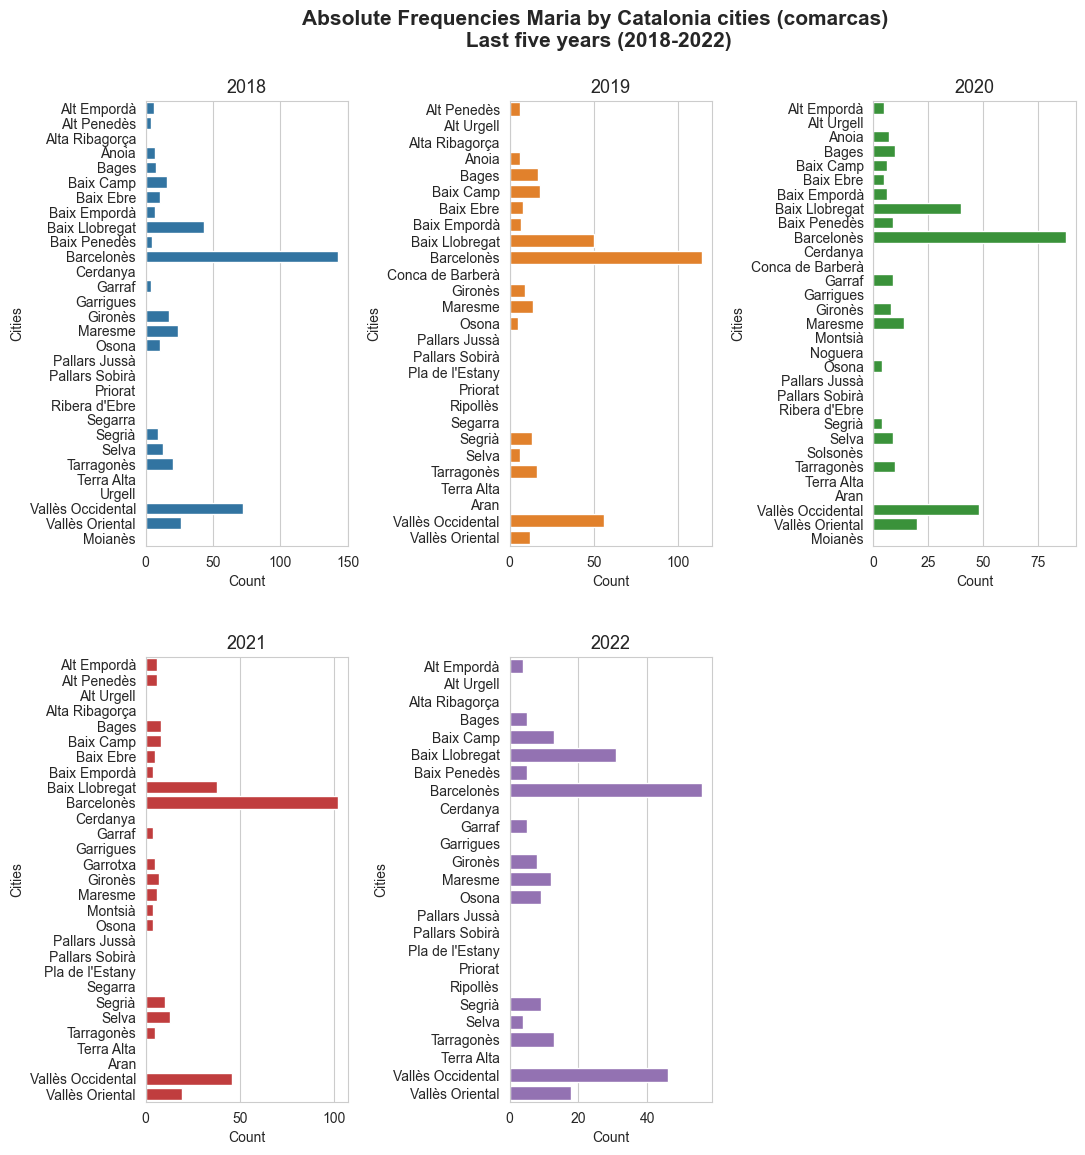

In [28]:
# Define the number of rows and columns for the matrix plot
num_cols = 3  # You can adjust the number of columns as needed
num_rows = int(np.ceil(len(years) / num_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 13))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

colors = sns.color_palette("tab10", len(years))

# Loop through each 'geo' and create a subplot in the matrix
for i, color, year in zip(range(0,len(years)), colors, years) :

    ax = axes[i]  # Get the current axis
    sns.barplot(x=Maria_abs_freq_values[year], y=Maria_abs_freq_index[year], color=color, ax=ax)
    ax.set_title(f"{year}", fontsize=13)
    ax.tick_params(axis='x', rotation=0)
    ax.set_xlabel('Count')
    ax.set_ylabel('Cities')

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(len(years), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle('Absolute Frequencies Maria by Catalonia cities (comarcas)\n Last five years (2018-2022)', fontsize=15, y=0.95, weight='bold') # Establishing a general tittle for the plot.
plt.subplots_adjust(hspace=0.25, wspace=0.8) # Adjust vertical (hspace) and horizontal (wspace) spacing
# fig.savefig('Marias_Areas_Catalonia' + '.jpg', format='jpg', dpi=550)
# plt.tight_layout()
plt.show()

## **Gender info for the childs born in Catalonia in the last nine years (2014-2022)**

### **Extracting and processing the data**

In [29]:
def try_float(x):   
    try:
        return float(x)
    except ValueError:
        return None

url = 'https://www.idescat.cat/indicadors/?id=aec&n=15237&fil=43&lang=en'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table')

columns = table.find(class_="cap") 
columns_html = columns.select("thead th")
columns_list = []

for i in range(1,len(columns_html)) :
    columns_list.append(columns.select("thead th")[i].text)

columns_list = ['Year'] + columns_list
tr_list = table.select('tr')
useful_info_index = range(1,(len(tr_list)-3))

rows = dict()
for i , r in enumerate(useful_info_index) :
    text_data = tr_list[r].text
    row_data = text_data.replace('\n', ' ').split()
    row_data = [x.replace(',', '.') for x in row_data]
    row_data = [try_float(x) for x in row_data]
    row_data = [x for x in row_data if x != None]
    rows[i] = row_data

df = pd.DataFrame(rows)
df = df.T
df.columns = columns_list
df['Year'] = df['Year'].astype('int')
df['Boys_prop'] = round(df['Boys'] / df['Total'], 3)
df['Girls_prop'] = round(df['Girls'] / df['Total'], 3)

In [30]:
# Data-frame with the data

print('Gender info for the childs born in Catalonia in the last nine years (2014-2022)\n')
display(df)

Gender info for the childs born in Catalonia in the last nine years (2014-2022)



,Year,Boys,Girls,Total,Boys_prop,Girls_prop
0,2022,29.187,27.195,56.382,0.518,0.482
1,2021,29.604,28.030,57.634,0.514,0.486
2,2020,29.832,28.632,58.464,0.510,0.490
3,2019,31.453,30.095,61.548,0.511,0.489
4,2018,32.623,30.943,63.566,0.513,0.487
5,2017,34.462,32.341,66.803,0.516,0.484
6,2016,35.435,33.539,68.974,0.514,0.486
7,2015,36.406,34.044,70.450,0.517,0.483


### **Plotting the results**

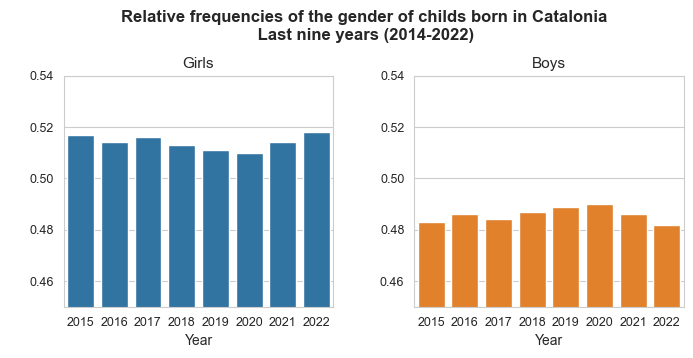

In [42]:
selected_columns = [x for x in df.columns if x in ['Boys_prop', 'Girls_prop']]

# Define the number of rows and columns for the matrix plot
num_cols = 2  # You can adjust the number of columns as needed
num_rows = int(np.ceil(len(selected_columns) / num_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 3))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

colors = sns.color_palette("tab10", len(selected_columns))
titles = ['Girls', 'Boys']

# Loop through each 'geo' and create a subplot in the matrix
for i, color, col_name, title in zip(range(0,len(selected_columns)), colors, selected_columns, titles) :
    ax = axes[i]  # Get the current axis
    sns.barplot(x="Year", y=col_name, data=df, color=color, ax=ax)
    ax.set_title(f"{title}", fontsize=11)
    xticks_index = np.arange(0, len(df), 1)
    ax.set_xticks(xticks_index)
    ax.tick_params(axis='x', rotation=0, labelsize=9)
    ax.tick_params(axis='y', rotation=0, labelsize=9)
    ax.set_xlabel('Year')
    ax.set_ylabel(' ')
    ax.set_ylim([0.45, 0.54])

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(len(selected_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle('Relative frequencies of the gender of childs born in Catalonia\n Last nine years (2014-2022)', fontsize=12, y=1.1, weight='bold') # Establishing a general tittle for the plot.
plt.subplots_adjust(hspace=0.6, wspace=0.3) # Adjust vertical (hspace) and horizontal (wspace) spacing
# fig.savefig('Gender_born_Catalonia' + '.jpg', format='jpg', dpi=550)
# plt.tight_layout()
plt.show()

## **Maria's analysis in Catalonia by province**

### **Extracting and processing the data**

In [43]:
years = ['2018', '2019', '2020', '2021', '2022']
Maria_df_dict = dict()

for prov_id in range(0, 4): # 4 = len(data_json['onomastica_nadons']['ff']['f']) - 1

    Maria_abs_freq, Maria_total_position, Maria_girls_position, Maria_total_percent, Maria_girls_percent = [], [], [], [], []

    for year in years :

        url = f'https://api.idescat.cat/onomastica/v1/nadons/dades.json?id=40683&class=prov&t={year}&lang=es'
        response = requests.get(url)
        data_json = response.json() 

        Maria_abs_freq.append(data_json['onomastica_nadons']['ff']['f'][prov_id]['pos1']['v']) # abs freq name Maria over the names of childs born in province {prov_id} in {year}
        Maria_total_position.append(data_json['onomastica_nadons']['ff']['f'][prov_id]['rank']['total']) # rank of name Maria over the names of childs born in province {prov_id} in {year}
        Maria_girls_position.append(data_json['onomastica_nadons']['ff']['f'][prov_id]['rank']['sex']) # rank of name Maria over the names of girls born in province {prov_id} in {year}
        Maria_total_percent.append(data_json['onomastica_nadons']['ff']['f'][prov_id]['pos1']['w']['total']) # % of childs born in province {prov_id} in {year} whose name is Maria
        Maria_girls_percent.append(data_json['onomastica_nadons']['ff']['f'][prov_id]['pos1']['w']['sex'])  # % of girls born in province {prov_id} in {year} whose name is Maria

    Maria_dict = dict()
    Maria_dict['years'] = years
    Maria_dict['Maria_abs_freq'] = Maria_abs_freq
    Maria_dict['Maria_total_position'] = Maria_total_position
    Maria_dict['Maria_girls_position'] = Maria_girls_position
    Maria_dict['Maria_total_percent'] = Maria_total_percent
    Maria_dict['Maria_girls_percent'] = Maria_girls_percent  
    prov = data_json['onomastica_nadons']['ff']['f'][prov_id]['c']['content']
    Maria_df_dict[prov] = pd.DataFrame(Maria_dict)

In [48]:
print('Maria\'s analysis in Catalonia by province')

for prov in Maria_df_dict.keys():
    print('-----------------------------------------------------------------------------------------------')
    print(prov)
    display(Maria_df_dict[prov])

Maria's analysis in Catalonia by province
-----------------------------------------------------------------------------------------------
Barcelona


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,344,11,5,7.41,15.19
1,2019,288,14,7,6.46,13.17
2,2020,245,19,9,5.81,11.89
3,2021,_,_,_,_,_
4,2022,189,33,14,4.59,9.56


-----------------------------------------------------------------------------------------------
Girona


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,47,6,2,7.00,14.43
1,2019,27,31,16,4.21,8.62
2,2020,33,21,11,5.24,10.79
3,2021,37,12,5,6.10,12.45
4,2022,19,47,22,3.21,6.52


-----------------------------------------------------------------------------------------------
Lleida


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,17,28,13,4.89,10.15
1,2019,23,8,3,6.69,13.71
2,2020,8,69,38,2.44,4.84
3,2021,17,19,7,5.30,11.06
4,2022,19,15,7,5.89,12.22


-----------------------------------------------------------------------------------------------
Tarragona


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,58,4,2,8.81,18.22
1,2019,49,6,4,7.60,15.85
2,2020,32,19,8,5.23,10.62
3,2021,30,26,12,5.00,10.33
4,2022,40,10,5,6.66,13.70


In [50]:
# Catalonia province with more Maria's born in 2022

Maria_abs_freq_2022 = dict()

for prov in Maria_df_dict.keys():
    Maria_abs_freq_2022[prov] = Maria_df_dict[prov].loc[Maria_df_dict[prov]['years'] == '2022', 'Maria_abs_freq'].iloc[0]

Maria_abs_freq_2022_values = np.array([x for x in Maria_abs_freq_2022.values()], dtype=int)
Maria_abs_freq_2022_index = np.array([x for x in Maria_abs_freq_2022.keys()])
prov_max_Maria_2022 = Maria_abs_freq_2022_index[np.argmax(Maria_abs_freq_2022_values)]
print('Catalonia province with more Maria\'s born in 2022 -->', prov_max_Maria_2022)

Catalonia province with more Maria's born in 2022 --> Barcelona


### **Plotting the results**

In [ ]:
Maria_df_dict['Barcelona'] = Maria_df_dict['Barcelona'].drop([3], axis=0)

for prov in Maria_df_dict.keys() :
    for col_name in Maria_df_dict[prov].columns :
        if col_name in ['Maria_abs_freq', 'Maria_total_position', 'Maria_girls_position'] :
            Maria_df_dict[prov][col_name] = Maria_df_dict[prov][col_name].astype('int64')
        elif col_name in ['Maria_total_percent', 'Maria_girls_percent'] :
            Maria_df_dict[prov][col_name] = Maria_df_dict[prov][col_name].astype('float64')

provinces = Maria_df_dict.keys()

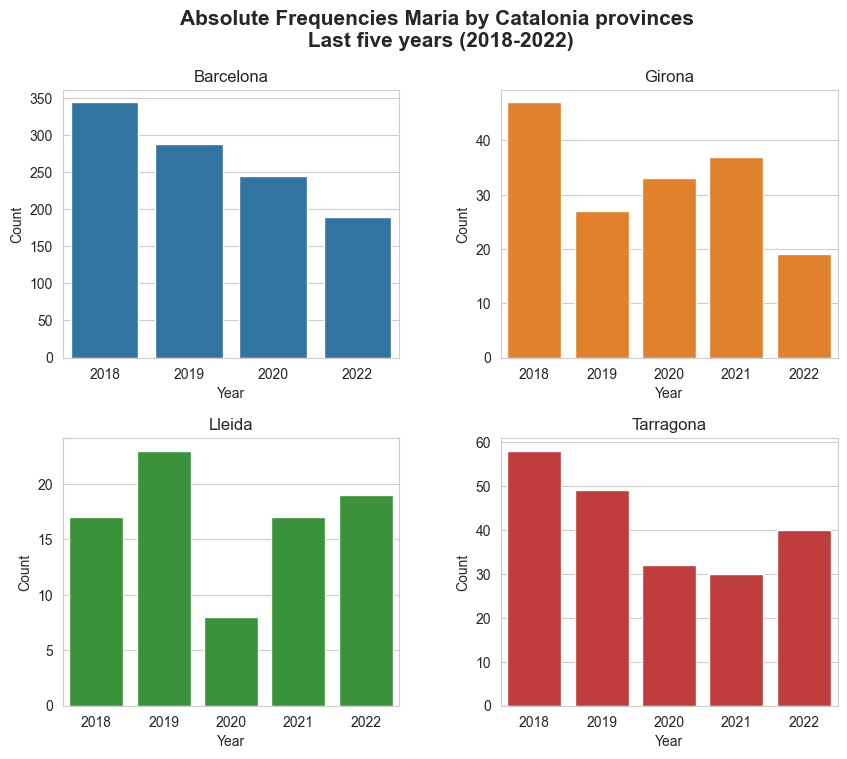

In [59]:
# Define the number of rows and columns for the matrix plot
num_cols = 2  # You can adjust the number of columns as needed
num_rows = int(np.ceil(len(provinces) / num_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

colors = sns.color_palette("tab10", len(provinces))

# Loop through each 'geo' and create a subplot in the matrix
for i, color, prov in zip(range(0,len(provinces)), colors, provinces) :
    ax = axes[i]  # Get the current axis
    sns.barplot(x="years", y='Maria_abs_freq', data=Maria_df_dict[prov], color=color, ax=ax)
    ax.set_title(f"{prov}", fontsize=12)
    xticks_index = np.arange(0, len(Maria_df_dict[prov]), 1)
    ax.set_xticks(xticks_index)
    ax.tick_params(axis='x', rotation=0)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(len(provinces), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle('Absolute Frequencies Maria by Catalonia provinces\n Last five years (2018-2022)', fontsize=15, y=0.98, weight='bold') # Establishing a general tittle for the plot.
plt.subplots_adjust(hspace=0.3, wspace=0.3) # Adjust vertical (hspace) and horizontal (wspace) spacing
# fig.savefig('Marias_Provinces_Catalonia' + '.jpg', format='jpg', dpi=550)
# plt.tight_layout()
plt.show()


## **Maria's analysis in Catalonia by area (region)**

### **Extracting and processing the data**

In [60]:
years = ['2018', '2019', '2020', '2021', '2022']
Maria_df_dict = dict()

for at_id in range(0, 8): # 8 = len(data_json['onomastica_nadons']['ff']['f']) - 1

    Maria_abs_freq, Maria_total_position, Maria_girls_position, Maria_total_percent, Maria_girls_percent = [], [], [], [], []

    for year in years :

        url = f'https://api.idescat.cat/onomastica/v1/nadons/dades.json?id=40683&class=at&t={year}&lang=es'
        response = requests.get(url)
        data_json = response.json() 

        Maria_abs_freq.append(data_json['onomastica_nadons']['ff']['f'][at_id]['pos1']['v']) # abs freq name Maria over the names of childs born in comarca {com_id} in {year}
        Maria_total_position.append(data_json['onomastica_nadons']['ff']['f'][at_id]['rank']['total']) # rank of name Maria over the names of childs born in comarca {com_id} in {year}
        Maria_girls_position.append(data_json['onomastica_nadons']['ff']['f'][at_id]['rank']['sex']) # rank of name Maria over the names of girls born in comarca {com_id} in {year}
        Maria_total_percent.append(data_json['onomastica_nadons']['ff']['f'][at_id]['pos1']['w']['total']) # % of childs born in comarca {com_id} in {year} whose name is Maria
        Maria_girls_percent.append(data_json['onomastica_nadons']['ff']['f'][at_id]['pos1']['w']['sex'])  # % of girls born in comarca {com_id} in {year} whose name is Maria

    Maria_dict = dict()
    Maria_dict['years'] = years
    Maria_dict['Maria_abs_freq'] = Maria_abs_freq
    Maria_dict['Maria_total_position'] = Maria_total_position
    Maria_dict['Maria_girls_position'] = Maria_girls_position
    Maria_dict['Maria_total_percent'] = Maria_total_percent
    Maria_dict['Maria_girls_percent'] = Maria_girls_percent  
    at = data_json['onomastica_nadons']['ff']['f'][at_id]['c']['content']
    Maria_df_dict[at] = pd.DataFrame(Maria_dict)

In [61]:
print('Maria\'s analysis in Catalonia by area (region)')

for at in Maria_df_dict.keys():
    print('-----------------------------------------------------------------------------------------------')
    print(at)
    display(Maria_df_dict[at])

Maria's analysis in Catalonia by area (region)
-----------------------------------------------------------------------------------------------
Metropolità


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,308,10,5,7.67,15.66
1,2019,246,15,7,6.38,13.01
2,2020,210,22,10,5.77,11.80
3,2021,211,20,8,5.77,11.86
4,2022,164,30,13,4.63,9.63


-----------------------------------------------------------------------------------------------
Comarques Gironines


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,47,6,2,7.11,14.67
1,2019,27,31,16,4.29,8.77
2,2020,33,21,11,5.30,10.90
3,2021,37,12,5,6.21,12.69
4,2022,19,44,20,3.27,6.65


-----------------------------------------------------------------------------------------------
Camp de Tarragona


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,39,5,3,8.72,18.03
1,2019,35,3,2,8.26,17.34
2,2020,18,28,13,4.42,8.89
3,2021,17,37,18,4.27,8.89
4,2022,30,5,3,7.60,15.50


-----------------------------------------------------------------------------------------------
Terres de l'Ebre


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,14,7,4,10.52,21.41
1,2019,11,9,6,8.12,16.69
2,2020,5,30,16,4.13,8.17
3,2021,10,12,6,8.26,16.34
4,2022,5,37,15,4.00,8.35


-----------------------------------------------------------------------------------------------
Ponent


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,14,31,13,4.65,9.60
1,2019,20,7,4,6.78,13.93
2,2020,7,68,34,2.46,4.87
3,2021,16,15,5,5.76,11.98
4,2022,16,15,8,5.71,11.85


-----------------------------------------------------------------------------------------------
Comarques Centrals


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,22,18,8,6.46,13.56
1,2019,29,7,2,8.73,17.91
2,2020,17,19,7,5.40,11.14
3,2021,17,23,11,5.52,11.09
4,2022,17,22,9,5.46,11.36


-----------------------------------------------------------------------------------------------
Alt Pirineu i Aran


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,_,_,_,_,_
1,2019,_,_,_,_,_
2,2020,_,_,_,_,_
3,2021,0,_,_,0.00,0.00
4,2022,_,_,_,_,_


-----------------------------------------------------------------------------------------------
Penedès


,years,Maria_abs_freq,Maria_total_position,Maria_girls_position,Maria_total_percent,Maria_girls_percent
0,2018,20,23,12,5.38,11.22
1,2019,18,24,12,4.85,9.91
2,2020,27,4,3,7.59,15.86
3,2021,16,38,16,4.32,9.09
4,2022,15,38,18,4.26,8.87


In [62]:
# Catalonia region with more Maria\'s born in 2022

selected_at = [x for x in Maria_df_dict.keys() if x != 'Alt Pirineu i Aran']
Maria_abs_freq_2022 = dict()

for at in selected_at :
    Maria_abs_freq_2022[at] = Maria_df_dict[at].loc[Maria_df_dict[at]['years'] == '2022', 'Maria_abs_freq'].iloc[0]

Maria_abs_freq_2022_values = np.array([x for x in Maria_abs_freq_2022.values()], dtype=int)
Maria_abs_freq_2022_index = np.array([x for x in Maria_abs_freq_2022.keys()])
prov_max_Maria_2022 = Maria_abs_freq_2022_index[np.argmax(Maria_abs_freq_2022_values)]
print('Catalonia area with more Maria\'s born in 2022 -->', prov_max_Maria_2022)

Catalonia area with more Maria's born in 2022 --> Metropolità


### **Plotting the results**

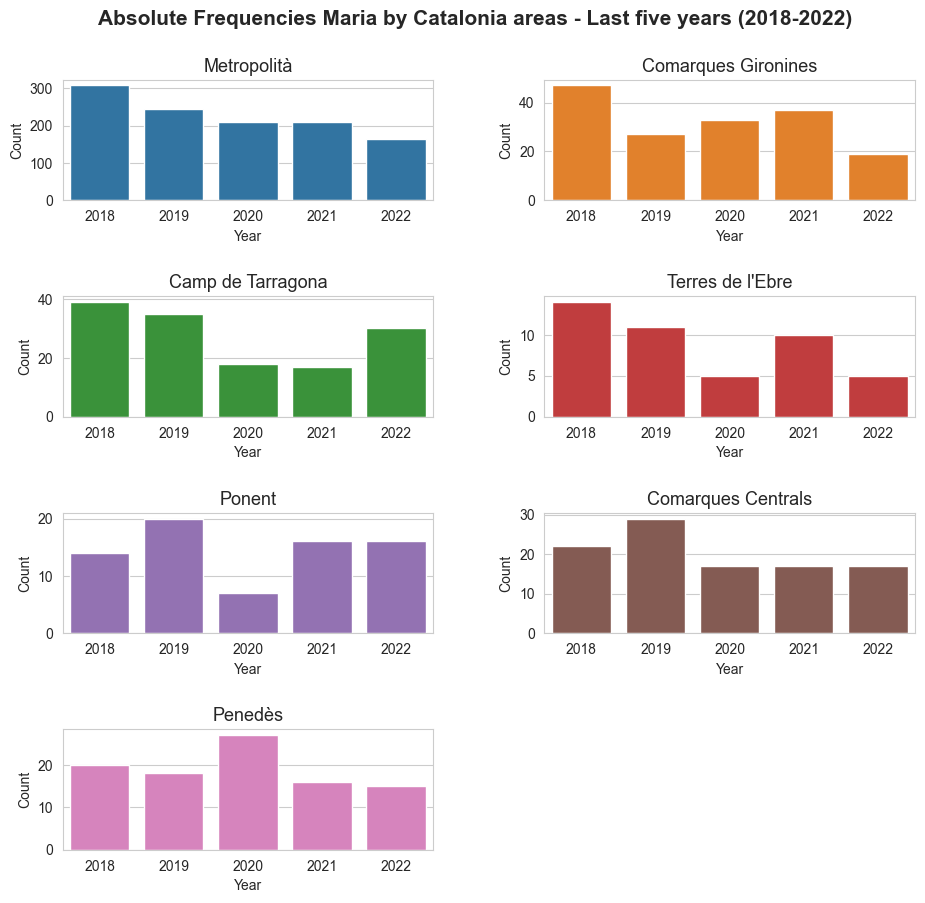

In [66]:
for at in selected_at :
    for col_name in Maria_df_dict[at].columns :
        if col_name in ['Maria_abs_freq', 'Maria_total_position', 'Maria_girls_position'] :
            Maria_df_dict[at][col_name] = Maria_df_dict[at][col_name].astype('int64')
        elif col_name in ['Maria_total_percent', 'Maria_girls_percent'] :
            Maria_df_dict[at][col_name] = Maria_df_dict[at][col_name].astype('float64')

# Define the number of rows and columns for the matrix plot
num_cols = 2  # You can adjust the number of columns as needed
num_rows = int(np.ceil(len(selected_at) / num_cols))

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 10))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

colors = sns.color_palette("tab10", len(selected_at))

# Loop through each 'geo' and create a subplot in the matrix
for i, color, at in zip(range(0,len(selected_at)), colors, selected_at) :
    ax = axes[i]  # Get the current axis
    sns.barplot(x="years", y='Maria_abs_freq', data=Maria_df_dict[at], color=color, ax=ax)
    ax.set_title(f"{at}", fontsize=13)
    xticks_index = np.arange(0, len(Maria_df_dict[at]), 1)
    ax.set_xticks(xticks_index)
    ax.tick_params(axis='x', rotation=0)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

# Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
for j in range(len(selected_at), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle('Absolute Frequencies Maria by Catalonia areas - Last five years (2018-2022)', fontsize=15, y=0.95, weight='bold') # Establishing a general tittle for the plot.
plt.subplots_adjust(hspace=0.8, wspace=0.3) # Adjust vertical (hspace) and horizontal (wspace) spacing
# fig.savefig('Marias_Areas_Catalonia' + '.jpg', format='jpg', dpi=550)
# plt.tight_layout()
plt.show()